In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
data = yf.download("GOOGL" , start = "2018-01-01" , interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.shape

(1162, 6)

In [ ]:
data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.651001,53.799000,52.651001,53.660500,53.660500,31766000
2018-01-03,53.696499,54.805000,53.671501,54.576000,54.576000,31318000
2018-01-04,54.854500,55.203999,54.713001,54.787998,54.787998,26052000


Understanding Trends with in the Data

In [ ]:
# Sort the data points based on indexes just for confirmation 
data.sort_index(inplace = True)

In [ ]:
# Remove any duplicate index 
data = data.loc[~data.index.duplicated(keep='first')]

In [ ]:
data.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-10,118.779999,120.919998,118.410004,119.699997,119.699997,30930400
2022-08-11,121.279999,121.489998,118.559998,118.839996,118.839996,24293700
2022-08-12,120.260002,121.680000,119.459999,121.680000,121.680000,19074200


In [ ]:
# Check for missing values 
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Get the statistics of the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1.162000e+03
mean,84.535412,85.456098,83.607253,84.558182,84.558182,3.573023e+07
std,31.667467,31.963695,31.302395,31.629023,31.629023,1.628298e+07
min,49.216000,50.605999,48.882999,49.233501,49.233501,9.312000e+06
25%,58.051251,58.848626,57.596624,58.358748,58.358748,2.527550e+07
50%,71.201500,71.846748,70.134003,71.003498,71.003498,3.169800e+07
75%,113.366123,115.280624,112.543877,113.942625,113.942625,4.093300e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.331780e+08


In [ ]:
import plotly.graph_objects as go

# Check the trend in Closing Values 
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index , y = data['Close'] , mode = 'lines'))
fig.update_layout(height = 500 , width = 900, 
                  xaxis_title='Date' , yaxis_title='Close')
fig.show()

In [ ]:
# Check the trend in Volume Traded
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index , y = data['Volume'] , mode = 'lines'))
fig.update_layout(height = 500 , width = 900, 
                  xaxis_title='Date' , yaxis_title='Volume')
fig.show()

Data Preparation

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
import pickle 
from tqdm.notebook import tnrange

In [ ]:
# Filter only required data 
data = data[['Close']]
data.head(3)

,Close
Date,
2018-01-02,53.660500
2018-01-03,54.576000
2018-01-04,54.787998


In [ ]:
data.shape

(1162, 1)

In [ ]:
Feature_Scaler = MinMaxScaler()
data_transformed = Feature_Scaler.fit_transform(data)

In [ ]:
data_transformed

array([[0.04400376],
       [0.05310371],
       [0.05521094],
       ...,
       [0.70042737],
       [0.69187908],
       [0.72010834]])

In [ ]:
def save_object(obj , name : str):
    pickle_out = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_out)
    pickle_out.close()

def load_object(name : str):
    pickle_in = open(f"{name}.pck","rb")
    data = pickle.load(pickle_in)
    return data

In [ ]:
# Save your objects for future purposes 
save_object(Feature_Scaler , "Scaler")

In [ ]:
def CreateFeatures_and_Targets(data, feature_length):
    X = []
    Y = []

    for i in tnrange(len(data_transformed) - feature_length): 
        X.append(data_transformed[i : i + feature_length])
        Y.append(data_transformed[i+feature_length])

    X = np.array(X)
    Y = np.array(Y)

    return X , Y

In [ ]:
X , Y = CreateFeatures_and_Targets(data , 20)

  0%|          | 0/1142 [00:00<?, ?it/s]

In [ ]:
X

array([[[0.04400376],
        [0.05310371],
        [0.05521094],
        ...,
        [0.10083492],
        [0.1002982 ],
        [0.09577057]],

       [[0.05310371],
        [0.05521094],
        [0.06243227],
        ...,
        [0.1002982 ],
        [0.09577057],
        [0.09818099]],

       [[0.05521094],
        [0.06243227],
        [0.06438047],
        ...,
        [0.09577057],
        [0.09818099],
        [0.09786787]],

       ...,

       [[0.61746433],
        [0.60766363],
        [0.6216788 ],
        ...,
        [0.67826152],
        [0.67657176],
        [0.66991199]],

       [[0.60766363],
        [0.6216788 ],
        [0.59436904],
        ...,
        [0.67657176],
        [0.66991199],
        [0.70042737]],

       [[0.6216788 ],
        [0.59436904],
        [0.64188158],
        ...,
        [0.66991199],
        [0.70042737],
        [0.69187908]]])

In [ ]:
Y

array([[0.09818099],
       [0.09786787],
       [0.06686047],
       ...,
       [0.70042737],
       [0.69187908],
       [0.72010834]])

In [ ]:
# Confirm the Testing Set length 
test_length = data[(data.index >= '2022-01-01')].shape[0]

In [ ]:
Xtrain , Xtest , Ytrain , Ytest = X[:-test_length] , X[-test_length:] , Y[:-test_length] , Y[-test_length:]

In [ ]:
# Check Training Dataset Shape 
Xtrain.shape , Ytrain.shape

((988, 20, 1), (988, 1))

In [ ]:
# Check Testing Dataset Shape
Xtest.shape , Ytest.shape

((154, 20, 1), (154, 1))

Model Building

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau

save_best = ModelCheckpoint("best_weights.h5", monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.25,patience=4, min_lr=0.00001,verbose = 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM , Bidirectional

model = Sequential()

model.add(Bidirectional(LSTM(512 ,return_sequences=True , recurrent_dropout=0.1, input_shape=(20, 1))))
model.add(LSTM(256 ,recurrent_dropout=0.1))
model.add(Dropout(0.2))
model.add(Dense(64 , activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(32 , activation='elu'))
model.add(Dense(1 , activation='linear'))

In [ ]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.002)
model.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

In [ ]:
history = model.fit(Xtrain, Ytrain,
            epochs=10,
            batch_size = 1,
            verbose=1,
            shuffle=False ,
            validation_data=(Xtest , Ytest),
            callbacks=[reduce_lr , save_best])

Epoch 1/10
988/988 [==============================] - 713s 709ms/step - loss: 0.0031 - rmse: 0.0560 - val_loss: 0.0431 - val_rmse: 0.2075 - lr: 0.0020
Epoch 2/10
988/988 [==============================] - 680s 689ms/step - loss: 0.0099 - rmse: 0.0997 - val_loss: 0.0272 - val_rmse: 0.1649 - lr: 0.0020
Epoch 3/10
988/988 [==============================] - 679s 687ms/step - loss: 0.0073 - rmse: 0.0853 - val_loss: 0.0193 - val_rmse: 0.1389 - lr: 0.0020
Epoch 4/10
988/988 [==============================] - 687s 695ms/step - loss: 0.0053 - rmse: 0.0728 - val_loss: 0.0165 - val_rmse: 0.1284 - lr: 0.0020
Epoch 5/10
988/988 [==============================] - 680s 688ms/step - loss: 0.0042 - rmse: 0.0649 - val_loss: 0.0166 - val_rmse: 0.1288 - lr: 0.0020
Epoch 6/10
988/988 [==============================] - 686s 694ms/step - loss: 0.0034 - rmse: 0.0581 - val_loss: 0.0079 - val_rmse: 0.0889 - lr: 0.0020
Epoch 7/10
988/988 [==============================] - 683s 692ms/step - loss: 0.0025 - rmse: 0

In [ ]:
# Checking the model Structure 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (1, 20, 1024)            2105344   
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (1, 256)                  1311744   
                                                                 
 dropout (Dropout)           (1, 256)                  0         
                                                                 
 dense (Dense)               (1, 64)                   16448     
                                                                 
 dropout_1 (Dropout)         (1, 64)                   0         
                                                                 
 dense_1 (Dense)             (1, 32)                   2080      
                                                        

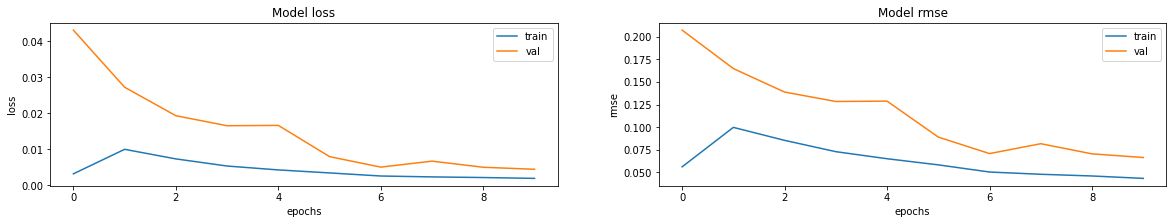

In [ ]:
# Interpreting the Metrics 
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['loss', 'rmse']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
# Load the best weights
model.load_weights("best_weights.h5")

Visualize prediction on Test Set

In [ ]:
Predictions = model.predict(Xtest)

In [ ]:
Predictions = Feature_Scaler.inverse_transform(Predictions)
Actual = Feature_Scaler.inverse_transform(Ytest)

In [ ]:
Predictions = np.squeeze(Predictions , axis = 1)
Actual = np.squeeze(Actual , axis = 1)

In [ ]:
# Creating Sample Test Dataframe
test_dataframe_dict = {'Actual' : list(Actual) , 'Predicted' : list(Predictions)}
test_df = pd.DataFrame.from_dict(test_dataframe_dict)

test_df.index = data.index[-test_length:]

In [ ]:
test_df.head()

,Actual,Predicted
Date,,
2022-01-03,144.991501,144.232071
2022-01-04,144.399506,144.240433
2022-01-05,137.774994,144.191269
2022-01-06,137.747498,143.717178
2022-01-07,137.016998,143.188705


In [ ]:
# Check the trend in Volume Traded
fig = go.Figure()

fig.add_trace(go.Scatter(x = test_df.index , y = Actual , mode = 'lines' , name='Actual'))
fig.add_trace(go.Scatter(x = test_df.index , y = Predictions , mode = 'lines' , name='Predicted'))
fig.show()

Visualize Prediction on whole data

In [ ]:
Total_features = np.concatenate((Xtrain , Xtest) , axis = 0)

In [ ]:
Total_Targets = np.concatenate((Ytrain , Ytest) , axis = 0)

In [ ]:
Predictions = model.predict(Total_features)

In [ ]:
Predictions = Feature_Scaler.inverse_transform(Predictions)
Actual = Feature_Scaler.inverse_transform(Total_Targets)

In [ ]:
Predictions = np.squeeze(Predictions , axis = 1)
Actual = np.squeeze(Actual , axis = 1)

In [ ]:
# Check the trend in Volume Traded
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index , y = Actual , mode = 'lines' , name='Actual'))
fig.add_trace(go.Scatter(x = data.index , y = Predictions , mode = 'lines' , name='Predicted'))
fig.show()

In [ ]:
model.predict(data_transformed[-21:-1].reshape(1, 20))

array([[0.70820296]], dtype=float32)

In [ ]:
Total_features.shape

(1142, 20, 1)

In [ ]:
Predictions.shape

(1142,)

In [ ]:
def PredictStockPrice(Model , df , ForecastDate , feature_length = 20):
    for i in range((datetime.strptime(ForecastDate, '%Y-%m-%d') - df.index[-1]).days):
      Features = df.iloc[-20:].values
      Features = Feature_Scaler.transform(Features)
      Prediction = Model.predict(Features.reshape(1,20))
      Prediction = Feature_Scaler.inverse_transform(Prediction)
      df_forecast = pd.DataFrame(Prediction, index=[df.index[-1]+ timedelta(days=1)], columns=['Close'])
      df = df.append(df_forecast)
    return df

In [ ]:
test = PredictStockPrice(model, data, '2022-08-19')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:
test.tail(10)

,Close
2022-08-10,119.699997
2022-08-11,118.839996
2022-08-12,121.680000
2022-08-13,121.020111
2022-08-14,121.524826
2022-08-15,121.991486
2022-08-16,122.456886
2022-08-17,122.916664
2022-08-18,123.418564
2022-08-19,123.911781


In [ ]:
test.Close.values

array([ 53.66049957,  54.57600021,  54.7879982 , ..., 122.91666412,
       123.41856384, 123.91178131])

In [ ]:
# Check the trend in Volume Traded
fig = go.Figure()

fig.add_trace(go.Scatter(x = test[-107:].index , y = test.Close[-107:], mode = 'lines' , name='Predicted'))
fig.add_trace(go.Scatter(x = data[-100:].index , y = data.Close[-100:], mode = 'lines' , name='Actual'))
fig.show()